# Introduction

## Imports

In [1]:
import pandas as pd

import numpy as np

import os

In [2]:
# load target
# I include this in the imports section because its as essential as an importa
target = pd.read_csv('../data/target_competencia_ids.csv')

# to avoid misunderstandings with data when predicting, and avoid accidentally predicting value zero
target.obj = np.nan

In [3]:
# days to consider
all_days = [18,19,20,21,22,23,24,25,26]

## Data info

In [4]:
for file in os.listdir('../data/'):
    print(file + '\t\t\t\t\t\t' + str(os.stat("../data/" + file).st_size/1000000))

auctions.csv						2412.11824
.ipynb_checkpoints						0.004096
target_competencia_ids.csv						0.200915
installs.csv						123.502317
desc.json						0.009146
Recomendaciones y aclaraciones.docx						0.006909
clicks.csv						16.147446
events.csv						2252.988966


# Useful functions

## General

In [5]:
# target ids related
def get_target_ids():
    """ get all target ids """
    return target['ref_hash'].apply(lambda x: x[:-3]).unique()

def get_target_ids_chunk(chunk_num):
    """ chunk num can go from 1 to 41 """
    chunk_size = 100
    start = (chunk_num - 1) * chunk_size
    stop = chunk_size * chunk_num
    return get_target_ids()[start:stop]

In [6]:
# para guardar predicciones
import time
def get_filename(my_name, timestamp):
    return "../predictions/" + timestamp + " by " + my_name + ".csv"

def save_description(authors_name, timestamp, submission_description):
    f = open("../predictions/" + authors_name + ".txt","a")
    f.write(timestamp + ": " + submission_description + '\n')
    f.close()

def save_submission(submission_df, authors_name, submission_description = "no description"):
    timestamp = time.strftime("%Y.%m.%d - %H:%M:%S")
    submission_df.to_csv(get_filename(authors_name, timestamp), index=False)
    save_description(authors_name, timestamp, submission_description)

In [7]:
# play a sound when whole notebook finished executing
import os
def ring(duration = 1, freq = 1500):
    """ play tone of duration in seconds and freq in Hz. """
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

## Dfs loading functions

In [8]:
clicks_dtypes = {'advertiser_id':'category',
                 'action_id':'category',
                 'source_id':'category',
                 'country_code':'category',
                 'latitude':'float64',
                 'longitude':'float64',
                 'wifi_connection':'bool',
                 'carrier_id':'category',
                 'trans_id':'category',
                 'os_minor':'category',
                 'agent_device':'category',
                 'os_major':'category',
                 'specs_brand':'category',
                 'brand':'category',
                 'timeToClick':'float64',
                 'touchX':'object',
                 'touchY':'object',
                 'ref_type':'category',
                 'ref_hash':'category'}

def load_clicks(users=get_target_ids(), days=all_days):
    """ load clicks csv, only users and days specified in users and days lists.
    If lists left empty, consider whole set of users and days respectively."""
    iter_clicks = pd.read_csv('../data/clicks.csv', engine='c', dtype=clicks_dtypes, parse_dates=['created'], chunksize=10000)
    def load_condition(chunk):
        return chunk['ref_hash'].isin(users) & chunk['created'].dt.day.isin(days)
    df = pd.concat(chunk.loc[load_condition(chunk)] for chunk in iter_clicks)
    return df

In [9]:
installs_dtypes = {"application_id":          "category",
                   "ref_type":                "category",
                   "ref_hash":                "category",
                   "click_hash":             "category",
                   "attributed":               "bool",
                   "implicit":                 "bool",
                   "device_countrycode":      "category",
                   "device_brand":          "category",
                   "device_model":          "category",
                   "session_user_agent":     "category",
                   "user_agent":             "category",
                   "event_uuid":             "category",
                   "kind":                   "category",
                   "wifi":                   "category",
                   "trans_id":               "category",
                   "ip_address":              "category",
                   "device_language":       "category"}

def load_installs(users=get_target_ids(), days=all_days):
    """ load installs csv, only users and days specified in users and days lists.
    If lists left empty, consider whole set of users and days respectively."""
    df_installs = pd.read_csv('../data/installs.csv', engine='c', dtype=installs_dtypes, parse_dates=['created'])
    def load_condition(df):
        return df['ref_hash'].isin(users) & df['created'].dt.day.isin(days)
    df = df_installs.loc[load_condition(df_installs)]
    return df

In [10]:
events_dtypes = {"index":                   "category",
                 "event_id":                "category",
                 "ref_type":                "category",
                 "ref_hash":                "category",
                 "application_id":          "category",
                 "attributed":               "bool",
                 "device_countrycode":      "category",
                 "device_os_version":     "category",
                 "device_brand":          "category",
                 "device_model":          "category",
                 "device_city":           "category",
                 "session_user_agent":    "category",
                 "trans_id":               "category",
                 "user_agent":            "category",
                 "event_uuid":             "category",
                 "carrier":               "category",
                 "kind":                  "category",
                 "device_os":             "category",
                 "wifi":                     "bool",
                 "connection_type":        "category",
                 "ip_address":              "category",
                 "device_language":       "category"}

def load_events(users=get_target_ids(), days=all_days):
    """ load events csv, only users and days specified in users and days lists.
    If lists left empty, consider whole set of users and days respectively."""
    iter_events = pd.read_csv('../data/events.csv', engine='c', dtype=events_dtypes, parse_dates=['date'], chunksize=10000)
    def load_condition(chunk):
        return chunk['ref_hash'].isin(users) & chunk['date'].dt.day.isin(days)
    df = pd.concat(chunk.loc[load_condition(chunk)] for chunk in iter_events)
    return df

In [11]:
auctions_dtypes = {'device_id':'category',
                 'ref_type_id':'category',
                 'source_id':'category'}

def load_auctions(users=get_target_ids(), days=all_days):
    """ load auctions csv, only users and days specified in users and days lists.
    If lists left empty, consider whole set of users and days respectively."""
    iter_auctions = pd.read_csv('../data/auctions.csv', engine='c', dtype=auctions_dtypes, parse_dates=['date'], chunksize=10000)
    def load_condition(chunk):
        return chunk['device_id'].isin(users) & chunk['date'].dt.day.isin(days)
    df = pd.concat(chunk.loc[load_condition(chunk)] for chunk in iter_auctions)
    return df

# Recommended bibliography

- [Lifelines: Survival Analysis in Python](https://www.youtube.com/watch?v=XQfxndJH4UA): Introduction to survival analysis and the lifelines lib in python. Shows simple example (aka, theres code!!)
- [Tristan Boudreault | Survival analysis for conversion rates](https://www.youtube.com/watch?v=oui1hx2bM2o): Estudio de caso: Shopify. From pyData conference in Amsterdam
- [Introduction to survival analysis](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html#introduction-to-survival-analysis): by lifelines

#### Pseudo resumen de cosas utiles para aplicar
Para survival analysis se necesitan dos cosas:
- an array of durations
- either a boolean or binary array representing whether the “death” was observed or not (alternatively an individual can be censored).

# Un vistazo sobre los dfs

## Clicks

In [136]:
df = load_clicks(get_target_ids_chunk(1), all_days[:3])

In [137]:
df.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
11899,2,NaN,1,2019-04-20 04:23:39.214000+00:00,6287817205707153877,1.771786,0.850556,True,1.0,2erPcX11IzP-xXiSiUTEOtMKiIKd9lQ,1.5176438893491397e+18,NaN,5.131615556736863e+18,3576558787748411622,NaN,NaN,NaN,NaN,1891515180541284343,1102680423242413676
11922,2,NaN,1,2019-04-20 04:30:28.785000+00:00,6287817205707153877,1.771786,0.850556,True,1.0,xXnQL1gGPzqGs-BFn45NS9i5gkZsIqU,1.5176438893491397e+18,NaN,5.131615556736863e+18,3576558787748411622,NaN,403.314,0.933,1.093,1891515180541284343,1102680423242413676
25085,2,NaN,1,2019-04-18 16:55:31.227000+00:00,6287817205707153877,1.791655,0.855685,True,1.0,2nebL7UP8AoozSeLGQW1p6f78TATevg,1.5176438893491397e+18,NaN,5.131615556736863e+18,3576558787748411622,NaN,115.522,0.579,1.407,1891515180541284343,1102680423242413676
61291,1,NaN,1,2019-04-20 19:53:18.984000+00:00,6287817205707153877,1.714538,0.871000,False,11.0,pXaVgJhWiXXTvNY3H0OgmA5V1HOjmWI,1.5176438893491397e+18,NaN,5.131615556736863e+18,71913840936116953,NaN,0.838,0.118,0.020,1891515180541284343,1058525390691423513
63806,1,NaN,1,2019-04-19 12:46:43.763000+00:00,6287817205707153877,1.713614,0.870279,True,1.0,-USvZQZBbN-CmUmaxwghWUUJA1dNnx4,1.5176438893491397e+18,NaN,5.131615556736863e+18,71913840936116953,NaN,17.752,0.359,1.247,1891515180541284343,1058525390691423513


## Installs

In [141]:
df = load_installs(get_target_ids_chunk(1), all_days[:3])

In [142]:
df.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
7016,2019-04-19 02:37:34.033,14,1891515180541284343,1128814228344083814,NaN,False,False,6287817205707153877,2.208834667126999e+18,4.445013666528814e+18,NaN,NaN,NaN,NaN,NaN,NaN,2514363106721953847,3.3013777759776993e+18
7022,2019-04-19 02:37:34.101,14,1891515180541284343,1128814228344083814,NaN,False,True,6287817205707153877,2.208834667126999e+18,4.445013666528814e+18,HasOffers Mobile AppTracking v1.0,NaN,f4714013-b8aa-415e-aa58-fa98ebf64d23,Open,NaN,NaN,2514363106721953847,3.3013777759776993e+18
28381,2019-04-18 22:23:29.656,49,1494519392962156891,1048782984015604883,NaN,False,True,6287817205707153877,NaN,6.794880020077885e+18,http-kit/2.0,SinDelantal/1 CFNetwork/976 Darwin/18.2.0,834549e2-52f8-4d83-afd5-4dace2a4c50d,af_app_opened,true,NaN,7869038058745259581,8.441417429938962e+18
48676,2019-04-20 12:35:20.625,77,1891515180541284343,1054881396892383323,NaN,False,False,6287817205707153877,NaN,1.3445980799392305e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,154615607683715141,4.060929664968129e+18
50673,2019-04-20 02:31:26.269,78,1891515180541284343,1010265377387765028,NaN,False,False,6287817205707153877,6.115025880051902e+18,1.670346184923358e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; JKM-LX3...,NaN,NaN,true,NaN,9101982838620332898,6.977049253562486e+18


## Events

In [143]:
df = load_events(get_target_ids_chunk(1), all_days[:3])

In [144]:
df.head()

,index,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
170519,177561,2019-04-18 03:43:09.185,13,1891515180541284343,1106971792117053344,65,False,6287817205707153877,NaN,2.208834667126999e+18,...,NaN,4.0670089932515717e+18,a27f9076-4e31-42a4-8e28-bcf17e58fa98,NaN,4.853173252142275e+18,NaN,True,NaN,7209709704711395089,6.977049253562486e+18
170521,177563,2019-04-18 03:43:25.436,13,1891515180541284343,1106971792117053344,65,False,6287817205707153877,NaN,2.208834667126999e+18,...,NaN,4.0670089932515717e+18,ad49682d-5bd2-47b4-aaaa-6196ac417503,NaN,4.853173252142275e+18,NaN,True,NaN,7209709704711395089,6.977049253562486e+18
170525,177577,2019-04-18 03:43:21.320,13,1891515180541284343,1106971792117053344,65,False,6287817205707153877,NaN,2.208834667126999e+18,...,NaN,4.0670089932515717e+18,1e67b319-e2dd-4ac9-b6e6-879576320bd8,NaN,4.853173252142275e+18,NaN,True,NaN,7209709704711395089,6.977049253562486e+18
170529,177589,2019-04-18 03:43:08.996,13,1891515180541284343,1106971792117053344,65,False,6287817205707153877,NaN,2.208834667126999e+18,...,NaN,4.0670089932515717e+18,44e56660-8642-4541-8724-5a1503c23542,NaN,4.853173252142275e+18,NaN,True,NaN,7209709704711395089,6.977049253562486e+18
171835,180801,2019-04-19 17:01:38.181,15,1891515180541284343,1117811498061299916,65,False,6287817205707153877,NaN,2.208834667126999e+18,...,NaN,8.237820697921044e+18,ce425a21-4271-4b8f-89cb-371e67a128c5,NaN,5.500848327478996e+18,NaN,True,NaN,3382054713307838865,6.977049253562486e+18


## Auctions

In [147]:
df = load_auctions(get_target_ids_chunk(1), all_days[:3])

In [148]:
df.head()

,date,device_id,ref_type_id,source_id
289649,2019-04-18 19:58:47.826462,1114026657194419748,1,0
317697,2019-04-18 23:34:28.216676,1102680423242413676,1,1
317713,2019-04-18 23:34:36.035822,1102680423242413676,1,1
317978,2019-04-18 23:42:35.347774,1102680423242413676,1,1
318297,2019-04-18 23:44:54.822177,1102680423242413676,1,1


# ML

### Probando cosas con subastas...

In [52]:
def prepare_auctions_df(df):
    asdf = df
    
    asdf = asdf.sort_values(['date'])
    
    asdf['diff'] = asdf['date'].diff()

    asdf['diff'].fillna(value=asdf['date']-asdf['date'].dt.floor('d'), inplace=True)

    asdf['diff_in_sec'] = asdf['diff'].dt.total_seconds()

    asdf.drop('diff', axis='columns', inplace=True)

    asdf['observed'] = True
    
    return asdf

In [53]:
df = load_auctions(get_target_ids_chunk(1), all_days[:3])

In [54]:
df.head()

,date,device_id,ref_type_id,source_id
289649,2019-04-18 19:58:47.826462,1114026657194419748,1,0
317697,2019-04-18 23:34:28.216676,1102680423242413676,1,1
317713,2019-04-18 23:34:36.035822,1102680423242413676,1,1
317978,2019-04-18 23:42:35.347774,1102680423242413676,1,1
318297,2019-04-18 23:44:54.822177,1102680423242413676,1,1


In [58]:
df.ref_type_id.get_dummies

[1, 7]
Categories (2, object): [1, 7]

In [57]:
prepared = prepare_auctions_df(df)

In [56]:
prepare_auctions_df

### Probando Lifelines...

In [21]:
T = reduced['diff_in_sec']
E = reduced['observed']

In [35]:
T = asdf['diff_in_sec']
E = asdf['observed']

#### Kaplan Meier

In [36]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 28 observations, 0 censored>

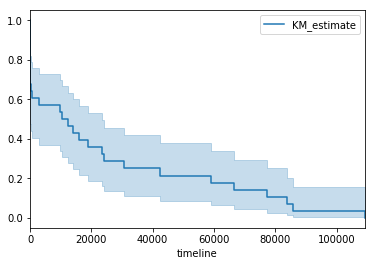

In [38]:
kmf.survival_function_
kmf.cumulative_density_
kmf.median_
kmf.plot_survival_function(); # or just kmf.plot()

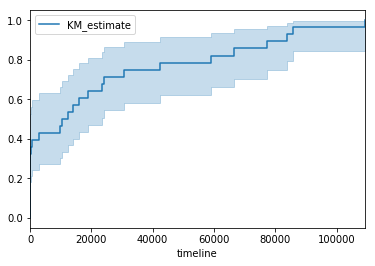

In [39]:
kmf.plot_cumulative_density();

#### CoxPHFitter

In [65]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.1)

In [24]:
reduced.head()

,date,device_id,ref_type_id,source_id,diff,diff_in_sec,observed
285338,2019-04-18 23:00:50.983090,3028036127478562480,1,0,23:00:50.983090,82850.983090,True
285339,2019-04-18 23:00:51.426613,7601431473174483609,1,0,23:00:51.426613,82851.426613,True
285340,2019-04-18 23:00:51.454013,5018235902686468387,1,0,23:00:51.454013,82851.454013,True
285341,2019-04-18 23:00:51.652223,5812445239233804650,7,0,23:00:51.652223,82851.652223,True
285342,2019-04-18 23:00:51.815673,8832711951922277816,7,0,23:00:51.815673,82851.815673,True


In [25]:
reduced.dtypes

date            datetime64[ns]
device_id               object
ref_type_id           category
source_id               object
diff           timedelta64[ns]
diff_in_sec            float64
observed                  bool
dtype: object

In [66]:
cph.fit(reduced.drop(['date', 'diff', 'source_id', 'day_of_week', 'hour'], axis=1), duration_col='diff_in_sec', event_col='observed', show_progress=True)
cph.print_summary()

Iteration 5: norm_delta = 0.00001, step_size = 1.0000, ll = -2463.99261, newton_decrement = 0.00000, seconds_since_start = 0.2Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 500 observations, 0 censored>
      duration col = 'diff_in_sec'
         event col = 'observed'
         penalizer = 0.1
number of subjects = 500
  number of events = 500
partial log-likelihood = -2463.99
  time fit was run = 2019-06-19 18:51:07 UTC

---
               coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
device_id     -0.00      1.00      0.00  -0.84   0.40      1.31       -0.00        0.00
ref_type_id_1 -0.06      0.94      5.69  -0.01   0.99      0.01      -11.22       11.10
ref_type_id_7  0.06      1.06      5.69   0.01   0.99      0.01      -11.10       11.22
minute        -2.01      0.13      0.14 -14.54 <0.005    156.77       -2.28       -1.74
second        -0.03      0.97      0.00  -9.99 <0.005     75.63       -0.04       -0.03
---
Concorda

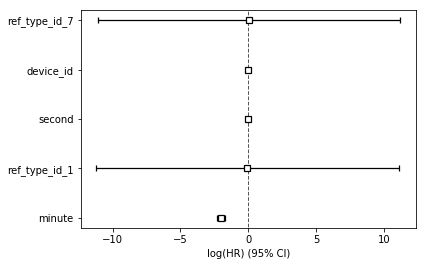

In [69]:
cph.plot();